In [1]:
from pymatgen.ext.matproj import MPRester
from jupyter_jsmol.pymatgen import quick_view

from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


In [2]:
with MPRester("OhzYzXS8KZ2GAhVz3g1zkqH8EJz32Y7X") as m:
    # Récupération de la structure du cristal KScO2
    structure = m.get_bandstructure_by_material_id("mp-8188")

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Nous allons afficher des images représentant la structure des bandes électroniques ainsi que la zone de brillouin et les points critiques du cristals KScO2, car elles nous seront  utiles tout au long de l'exercice.

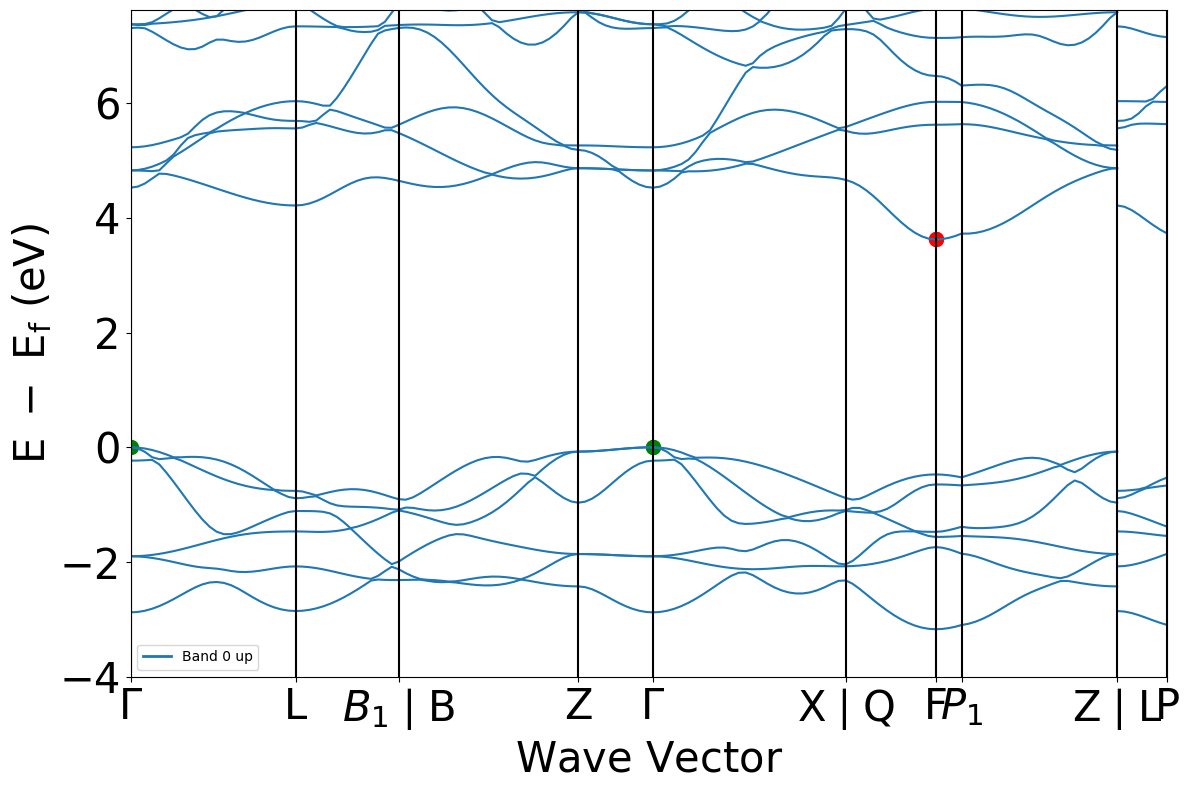

In [3]:
BandStruc = BSPlotter(structure)
fig = BandStruc.get_plot(vbm_cbm_marker=True)

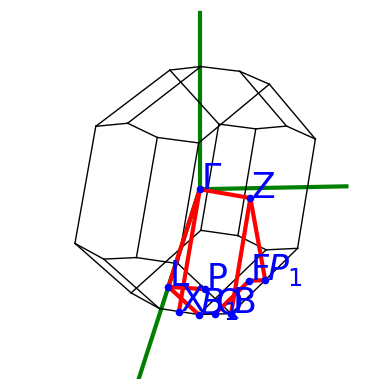

In [4]:
fig = BandStruc.plot_brillouin()

# 1) Bande interdite

In [5]:
BInterdite = structure.get_band_gap()
print(BInterdite)

{'direct': False, 'energy': 3.6240999999999994, 'transition': '\\Gamma-F'}


Premièrement, qu'est ce qu'une bande interdite ? C'est une bande de valeurs énergétiques dont les niveaux d'énergie ne peuvent pas être occupés par les électrons du cristal. On la visualise facilement sur l'image.

La bande interdite a ici une valeur de 3.6240999999999994 eV et la transition se fait ici du kpoint $\Gamma$ au kpoint F.

On voit qu'ici elle est dite indirecte car le maximum de la dernière bande de valence n'est pas aligné avec le minimum de la première bande de conduction. Donc lorsqu'on voudra faire passer un électron de la bande de valence à la bande de conduction, il faudra lui donner une énergie supérieure à 3.6240999999999994 eV.

Au vu de la valeur de la bande interdite (>3eV), on peut supposer que notre matériau est isolant.

# 2) Dispersion

Maintenant nous allons essayer de déterminer la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion. 

Pour cela nous allons regarder quelle branche définie par les axes verticaux a la pente à la valeur absolue la plus et la moins élevée.

### Dernière bande interdite

In [6]:
data = BandStruc.bs_plot_data()

ener = data.get('energy').get('1')
dist = data.get('ticks').get('distance')

vbm = structure.get_vbm()
print("L'énergie du maximum de bande de valence:",vbm['energy'],"[eV]")
print(" Le vecteur k (direction) en coordonnées cartésiennes) =",vbm['kpoint'].cart_coords)

cbm = structure.get_cbm()
print("L'énergie du minimum de bande de conduction:",cbm['energy'],"[eV]")
print(" Le vecteur k (direction) en coordonnées cartésiennes) =",cbm['kpoint'].cart_coords)

L'énergie du maximum de bande de valence: 1.7625 [eV]
 Le vecteur k (direction) en coordonnées cartésiennes) = [0. 0. 0.]
L'énergie du minimum de bande de conduction: 5.3866 [eV]
 Le vecteur k (direction) en coordonnées cartésiennes) = [ 0.5042561   0.         -1.05280175]


La dispersion maximale dans la bande de valence correspond à la pente de  0.683211957051207
La dispersion minimale dans la bande de valence correspond à la pente de  0.14684339139969663
 
La dispersion maximale dans la bande de conduction correspond à la pente de  1.6890571397967427
La dispersion minimale dans la bande de conduction correspond à la pente de  0.10330816100388339
 
Structures des bandes électroniques :


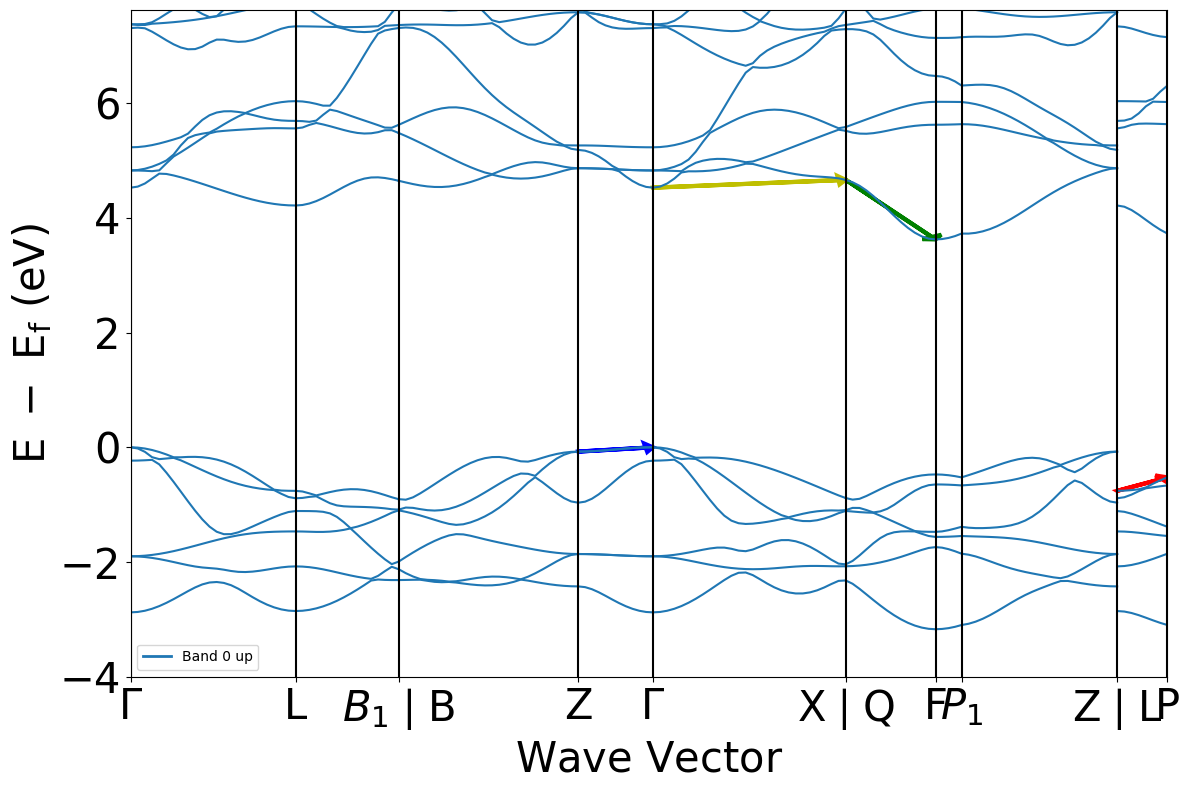

In [35]:
# print("Index vbm :" , vbm['band_index'])
# print("Index cbm :" ,cbm['band_index'])

vbm_index = 15
cbm_index = 16

pente_vbm = np.zeros(9)
pente_cbm = np.zeros(9)

dist_branch = np.unique(dist)

for i in range(9):
    delta_dist = dist_branch[i+1] - dist_branch[i]
    pente_vbm[i] = abs(((ener[i][vbm_index])[-1] - (ener[i][vbm_index])[0]) / (delta_dist))
    pente_cbm[i] = abs(((ener[i][cbm_index])[-1] - (ener[i][cbm_index])[0])/(delta_dist))
    
max_vbm = np.max(pente_vbm)
min_vbm = np.min(pente_vbm)

print("La dispersion maximale dans la bande de valence correspond à la pente de ", max_vbm)
print("La dispersion minimale dans la bande de valence correspond à la pente de ", min_vbm)
print(" ")

max_cbm = np.max(pente_cbm)
min_cbm = np.min(pente_cbm)

print("La dispersion maximale dans la bande de conduction correspond à la pente de ", max_cbm)
print("La dispersion minimale dans la bande de conduction correspond à la pente de ", min_cbm)
print(" ")

BandStruc.get_plot()

plt.arrow(dist_branch[np.argmax(pente_vbm)], (ener[np.argmax(pente_vbm)][vbm_index])[0], 
          dist_branch[np.argmax(pente_vbm)+1] - dist_branch[np.argmax(pente_vbm)], 
          (ener[np.argmax(pente_vbm)][vbm_index])[-1] - (ener[np.argmax(pente_vbm)][vbm_index])[0], 
          head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)

plt.arrow(dist_branch[np.argmin(pente_vbm)], (ener[np.argmin(pente_vbm)][vbm_index])[0], 
          dist_branch[np.argmin(pente_vbm)+1] - dist_branch[np.argmin(pente_vbm)], 
          (ener[np.argmin(pente_vbm)][vbm_index])[-1] - (ener[np.argmin(pente_vbm)][vbm_index])[0], 
          head_width=0.15, head_length=0.05, linewidth=3, color='b', length_includes_head=True)

plt.arrow(dist_branch[np.argmax(pente_cbm)], (ener[np.argmax(pente_cbm)][cbm_index])[0], 
          dist_branch[np.argmax(pente_cbm)+1] - dist_branch[np.argmax(pente_cbm)], 
          (ener[np.argmax(pente_cbm)][cbm_index])[-1] - (ener[np.argmax(pente_cbm)][cbm_index])[0], 
          head_width=0.15, head_length=0.05, linewidth=3, color='g', length_includes_head=True)

plt.arrow(dist_branch[np.argmin(pente_cbm)], (ener[np.argmin(pente_cbm)][cbm_index])[0], 
          dist_branch[np.argmin(pente_cbm)+1] - dist_branch[np.argmin(pente_cbm)], 
          (ener[np.argmin(pente_cbm)][cbm_index])[-1] - (ener[np.argmin(pente_cbm)][cbm_index])[0], 
          head_width=0.15, head_length=0.05, linewidth=3, color='y', length_includes_head=True)

print("Structures des bandes électroniques :")
plt.show()



# 3) Dispersion


Nous supposons que la dispersion est parabolique, don l'équation de la masse effective  m^*  est


$
m^* = \frac{\hbar^2}{\frac{d^2E}{dk^2}} \tag{1}
$

avec \hbar la constante réduite de Planck égale à $6.582 \times 10^{-16} \$, eV.s.


Pour des états proches des points d'intérêts (maxima et minima de bande), cette équation peut-être approximée par


$
E(k) - E_0 = \pm \frac{\hbar^2}{2m^*} (k_x^2 + k_y^2 + k_z^2). \tag{2}
$


Pour la suite du développement, nous considérerons que $ E(k) - E_0$  correspond à l'énergie de l'électron.

Mais cette formule n'est utilisable que si la norme du vecteur d'onde est non-nulle, vérifions donc si c'est le cas.



### Bande de valence 

In [46]:
kpoint_val = structure.get_vbm().get('kpoint').frac_coords
norm_k_val = np.linalg.norm(kpoint_val)
print('Pour la bande de valence, la valeur de la norme est {}'.format(norm_k_val))


Pour la bande de valence, la valeur de la norme est 0.0


Nous pouvons voir que pour la bande de valence, ce n'est pas le cas. Pour pouvoir tout de même utiliser l'équation définie précédemment, nous allons nous servir de la périodicité du réseau réciproque. Effectivement pour $n$ le numéro de bande et $G = l'G + m'G + n'G$ un vecteur du réseau réciproque, nous avons $ E_{n,k} = E_{n,k+G} $. La norme de $G$ est $p \frac{2\pi}{a}$ avec a la norme du vecteur de base du réseau direct et p un entier. Et nous avons déjà calculé la valeur de a dans lattice donc nous la récupérons simplement de là bas.

In [48]:
a= 6.384679806261575

h_bar = 6.582119570 * 1e-16 #eVs

G = 2*np.pi/a

ener_vbm = vbm['energy']

me_vbm = h_bar**2*G**2/(2*ener_vbm)
print('La masse effective du sommet de la dernière bande de valence est ' + str(me_vbm) + ' kg')

La masse effective du sommet de la dernière bande de valence est 1.1902930720691489e-31 kg


### Bande de conduction 

In [41]:
kpoint_con = structure.get_cbm().get('kpoint').frac_coords
norm_k_con = np.linalg.norm(kpoint_con)

print('Pour la bande de conduction, la valeur de la norme est {}'.format(norm_k_con))

Pour la bande de conduction, la valeur de la norme est 0.7071067811865476


Ici la norme n'est pas nulle donc on peut continuer classiquement

In [50]:
ener_cbm = cbm['energy']

me_cbm = h_bar**2*norm_k_con**2/(2**ener_cbm)

print('La masse effective de la base de la première bande de conduction est ' + str(me_cbm) + ' kg')



La masse effective de la base de la première bande de conduction est 5.178134947866813e-33 kg
